<a href="https://colab.research.google.com/github/Harumaru58/ASD_Autora_notebooks/blob/main/Brown_BayesTutorial_MRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

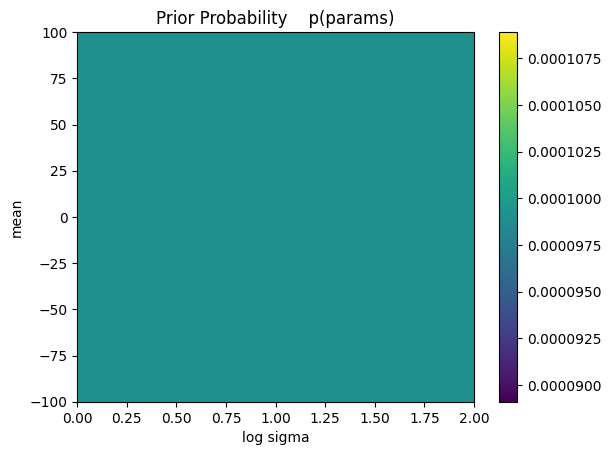

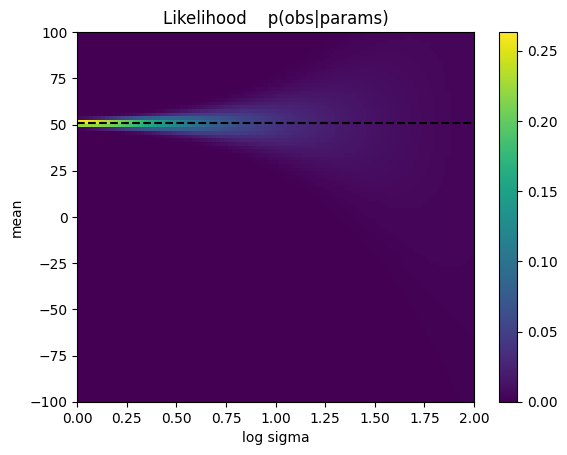

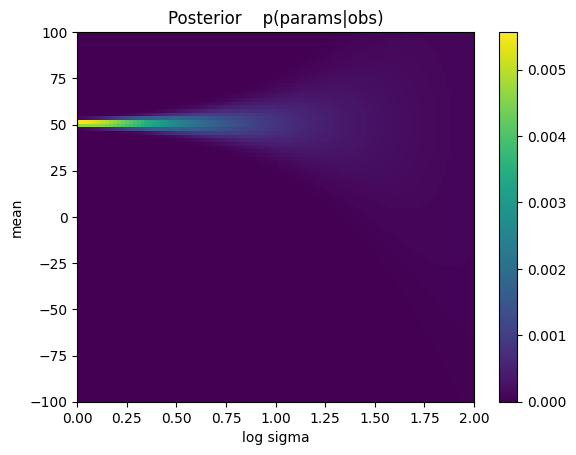

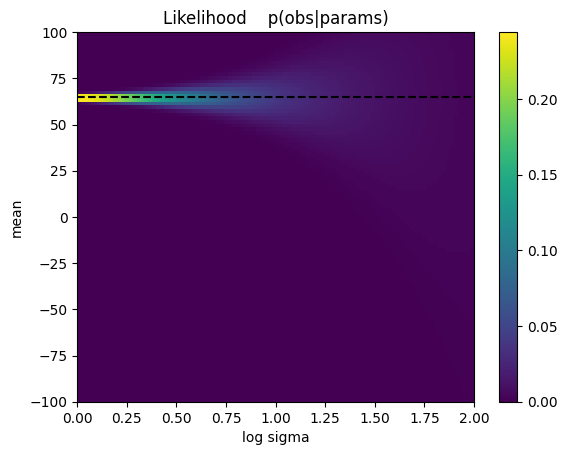

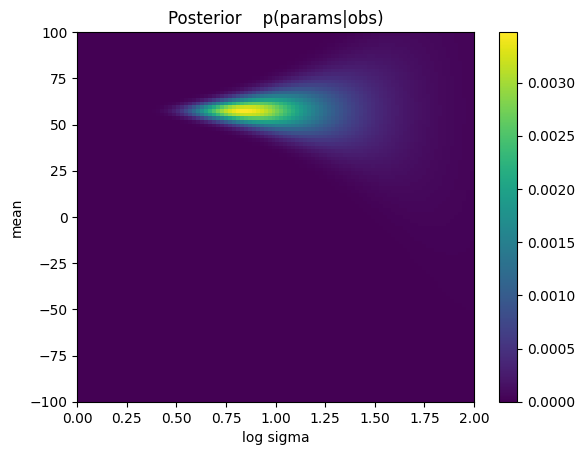

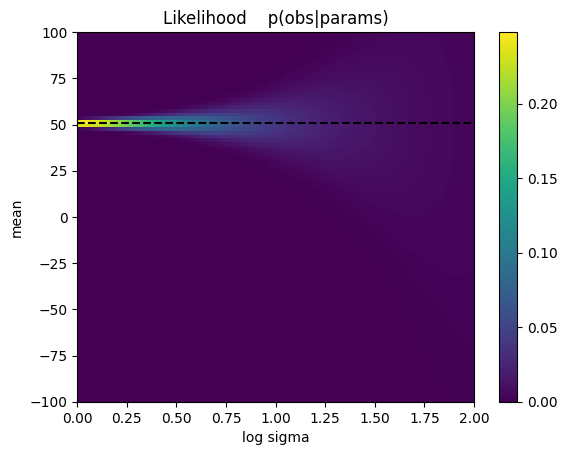

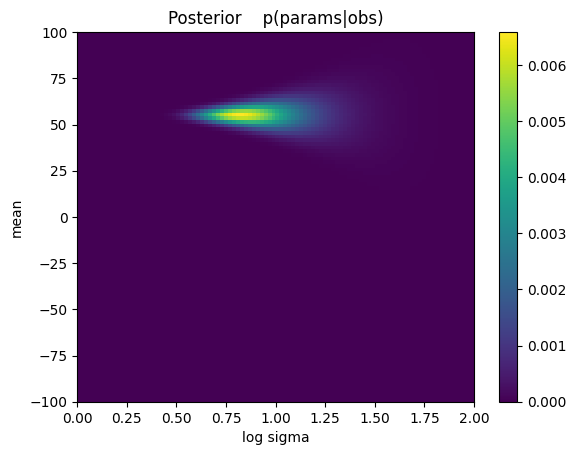

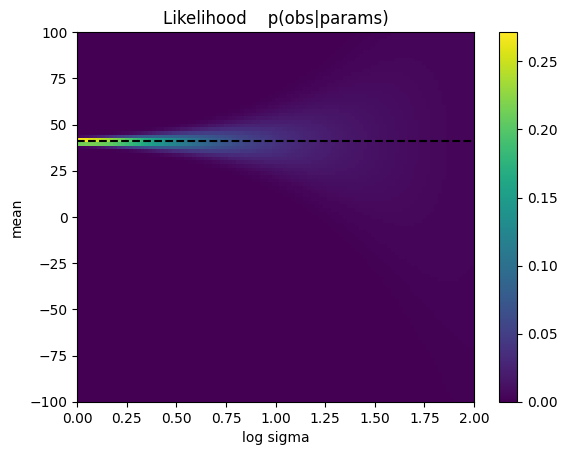

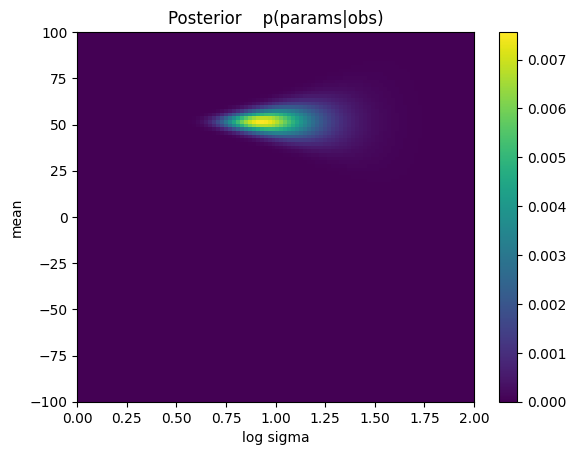

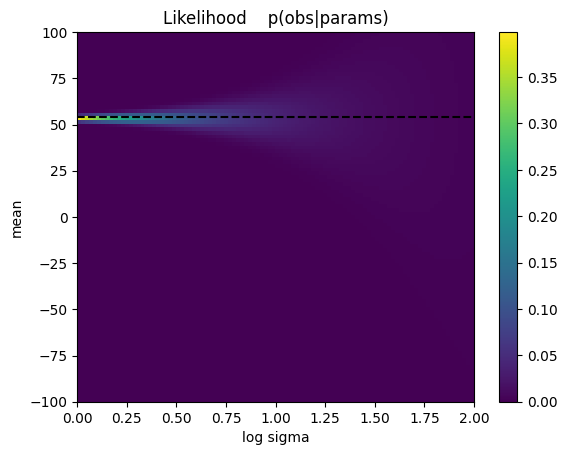

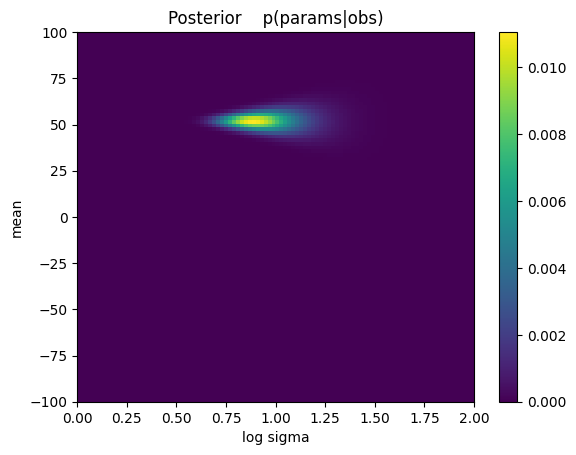

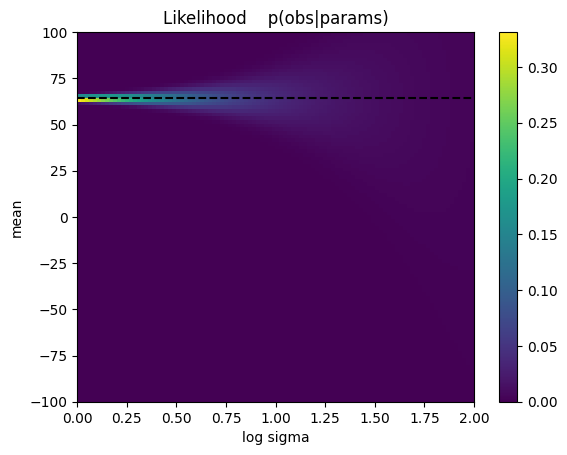

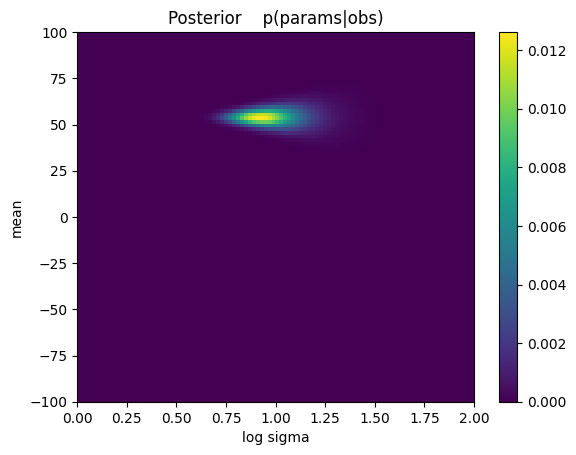

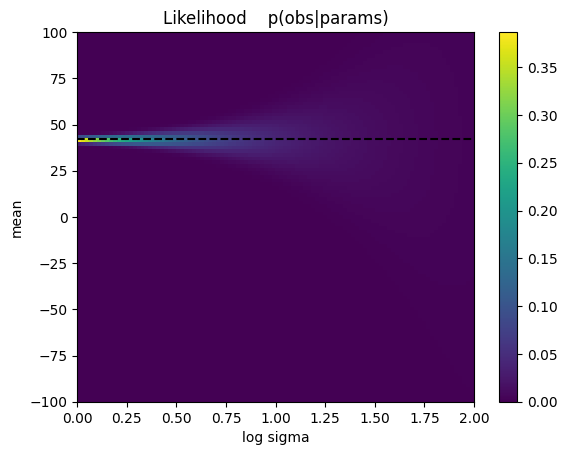

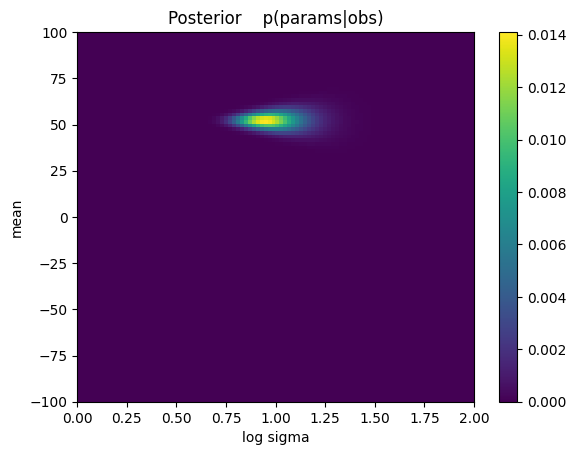

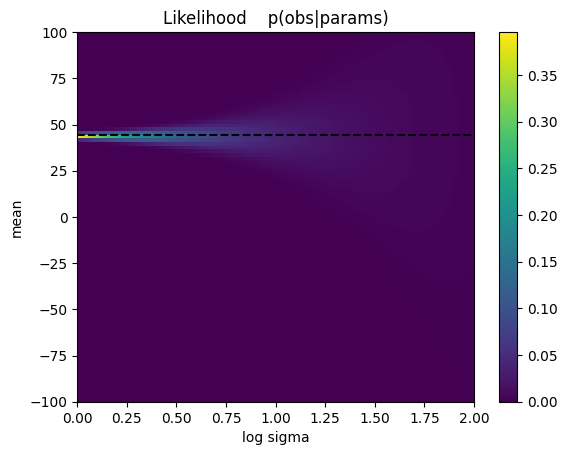

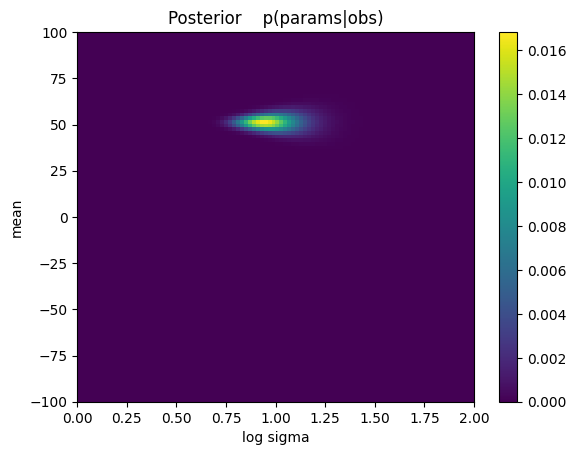

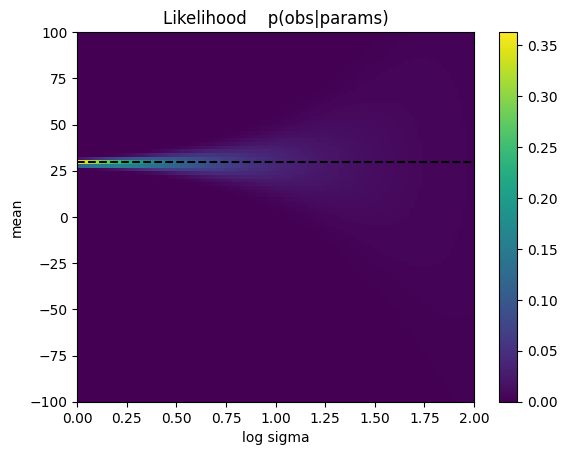

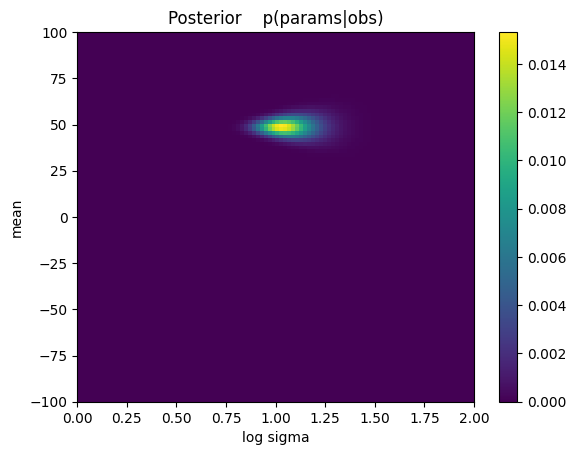

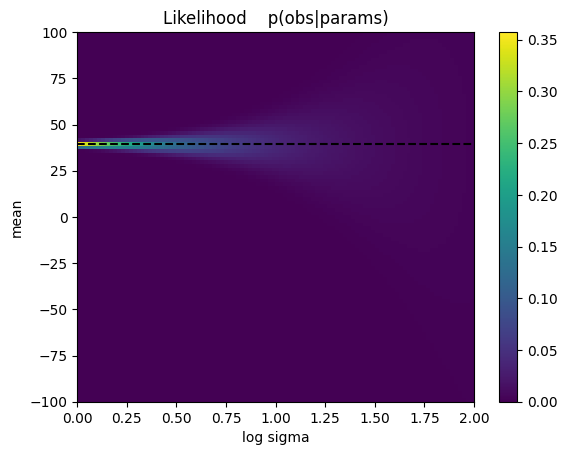

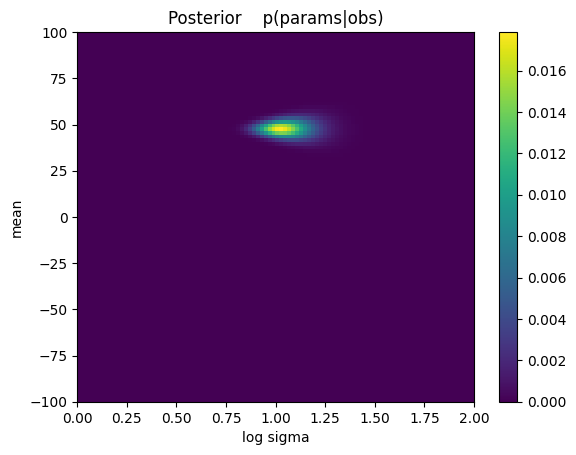

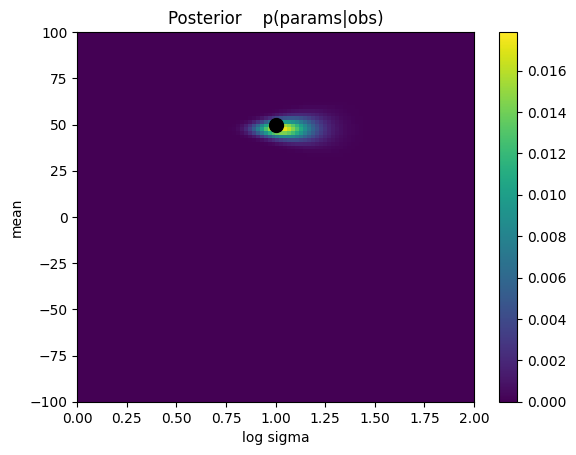

In [ ]:
# %%
# Example of Bayesian inference:

# Goal: Demonstrate how Bayesian inference can be used to infer the mean
# and standard deviation of the distribution that is generating a bunch of
# data.

# Additional resources: First two chapters of David MacKay book
# (MacKay.pdf) as well as MRN slides for modeling workshop
# (ModelingWorkshop_8-17-21).

# How to use this script:
# In order to understand Bayesian inference, it is probably best to look
# through the script line by line (it isn't long!) then run everything up
# to the for loop (~line 80). Instead of running the for loop all at
# once... I recommend running the code inside the loop a few times and
# looking at the plot of likelihoods and posteriors each time... how are they
# updated in response to new observations? Then, once you've gone through a
# few trials manually, you can run the whole script and see what happens...
# once you've done that probably also worth trying to change the
# "environment" to be a different mean/standard deviation and see if/how
# the model learns differently.

# MRN 8/15/18
# Made for Computational Modeling Workshop at Brown University
# Organized by Andra Geana

# %%
# ENVIRONMENT: UNOBSERVABLE!!!!

# Our "world" is pretty simple -- there is a normal distribution with a mean
# and variance that gives rise to observations.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

trueSig = 10
trueMean = 50
nSteps = 10

# %%
# Build distribution over possible parameter values (eg. model of environment)

# Here are the possible means of the distribution
possibleMeans = np.arange(-100, 102, 2)
possibleSigmas = np.logspace(0, 2, 100)  # and possible standard deviations

# This is our "Prior" over possible parameter values in the environment:
paramProb = np.ones((len(possibleMeans), len(possibleSigmas))) / (len(possibleMeans) * len(possibleSigmas))

# Look at our prior distribution:
plt.imshow(paramProb, aspect='auto', extent=[0, 2, -100, 100], origin='lower')
plt.colorbar()
plt.title('Prior Probability    p(params)')
plt.ylabel('mean')
plt.xlabel('log sigma')
plt.show()

# %%
# Now, make an observation, and update probability distribution over parameter values:

# Here is a timeseries of observations that we will encounter:
allObservations = np.random.normal(trueMean, trueSig, nSteps)

obsLike = np.empty_like(paramProb)

for i in range(nSteps):
    # 1) Make observation:
    observation = allObservations[i]

    # 2) Compute likelihood of observation from each possible parameter value:
    for ss in range(len(possibleSigmas)):
        for mm in range(len(possibleMeans)):
            obsLike[mm, ss] = norm.pdf(observation, possibleMeans[mm], possibleSigmas[ss])

    # Look at likelihood (eg. probability of data given model & parameters)
    plt.figure(1)
    plt.imshow(obsLike, aspect='auto', extent=[0, 2, -100, 100], origin='lower')
    plt.colorbar()
    plt.title('Likelihood    p(obs|params)')
    plt.ylabel('mean')
    plt.xlabel('log sigma')
    plt.plot([0, 2], [observation, observation], '--k')
    plt.show()

    # 3) Update probability distribution over parameter values:
    paramProb = paramProb * obsLike
    # Normalize for outcome probability
    paramProb = paramProb / np.sum(paramProb)

    plt.figure(1)
    plt.imshow(paramProb, aspect='auto', extent=[0, 2, -100, 100], origin='lower')
    plt.colorbar()
    plt.title('Posterior    p(params|obs)')
    plt.ylabel('mean')
    plt.xlabel('log sigma')
    plt.show()

# Plot posterior distribution
plt.figure(1)
plt.imshow(paramProb, aspect='auto', extent=[0, 2, -100, 100], origin='lower')
plt.clim(0, np.max(paramProb))
plt.colorbar()
plt.title('Posterior    p(params|obs)')
plt.ylabel('mean')
plt.xlabel('log sigma')

# How did we do?
plt.plot(np.log10(trueSig), trueMean, 'ok', markersize=10)
plt.show()
